![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:

<br>

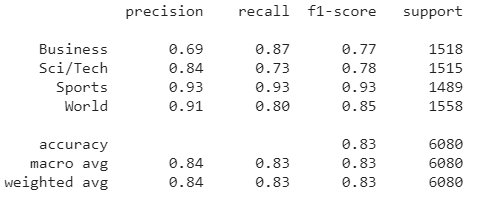

You can achieve these results or even better on this dataset with test data:


<br>

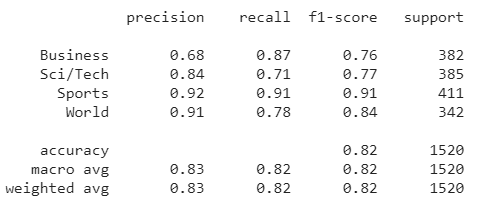






# 1. Install Java 8 and NLU

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null pyspark==2.4.7

import nlu

# 2. Download news classification dataset

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_train.csv
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

--2021-03-01 01:51:28--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.98.139
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.98.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24032125 (23M) [text/csv]
Saving to: ‘news_category_train.csv’

news_category_train 100%[===================>]  22.92M  50.0MB/s    in 0.5s    

2021-03-01 01:51:28 (50.0 MB/s) - ‘news_category_train.csv’ saved [24032125/24032125]

--2021-03-01 01:51:28--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.98.139
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.98.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1504408 (1.4M) [text/csv]
Saving to: ‘news_category_test.csv’

news_categ

In [ ]:
import pandas as pd
test_path = '/content/news_category_test.csv'
train_df = pd.read_csv(test_path)
train_df.columns=['y','text']
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,y,text
989,Sci/Tech,"By acquiring KVault, which makes e-mail-archiv..."
6701,Sci/Tech,"Early next year, the computer maker will begin..."
5384,World,quot;Aeolus was keeper of the winds. He gave ...
1309,Sports,A late rally gave the San Diego Padres a rar...
4043,Sports,As happy as Utah coach Urban Meyer was to hea...
...,...,...
6925,Business,Cola has decided not to sell its C2 brand in t...
3688,World,seeded Ivan Ljubicic of Croatia beat Victor Ha...
5132,Sci/Tech,A zoo in the Gulf has bred a bird which is thr...
6058,World,The 150 brokers and traders on the Iraq Stock ...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

By default, the Universal Sentence Encoder Embeddings (USE) are beeing downloaded to provide embeddings for the classifier. You can use any of the 50+ other sentence Emeddings in NLU tough!

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no
fitted_pipe = nlu.load('train.classifier').fit(train_df)

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df)
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,category,category_confidence,sentence,default_name_embeddings,text,y
origin_index,,,,,,
989,Sci/Tech,1.000000,"By acquiring KVault, which makes e-mail-archiv...","[0.07190942019224167, -0.05929875373840332, -0...","By acquiring KVault, which makes e-mail-archiv...",Sci/Tech
989,Sci/Tech,1.000000,s lead and rebuild investors #39;,"[0.053723689168691635, 0.019650151953101158, -...","By acquiring KVault, which makes e-mail-archiv...",Sci/Tech
989,Sci/Tech,1.000000,confidence.,"[0.022217048332095146, -0.02411036007106304, -...","By acquiring KVault, which makes e-mail-archiv...",Sci/Tech
6701,Sci/Tech,1.000000,"Early next year, the computer maker will begin...","[0.04153631627559662, -0.016046393662691116, -...","Early next year, the computer maker will begin...",Sci/Tech
5384,Business,0.611293,quot;,"[0.05674704536795616, 0.05588801950216293, -0....",quot;Aeolus was keeper of the winds. He gave ...,World
...,...,...,...,...,...,...
3688,Sports,1.000000,seeded Ivan Ljubicic of Croatia beat Victor Ha...,"[0.045119430869817734, -0.06392733752727509, -...",seeded Ivan Ljubicic of Croatia beat Victor Ha...,World
5132,Sci/Tech,0.998652,A zoo in the Gulf has bred a bird which is thr...,"[0.06242712214589119, -0.05575601011514664, -0...",A zoo in the Gulf has bred a bird which is thr...,Sci/Tech
6058,Business,0.999789,The 150 brokers and traders on the Iraq Stock ...,"[-0.03430037200450897, 0.03404074162244797, -0...",The 150 brokers and traders on the Iraq Stock ...,World


# 4. Evaluate the model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['category']))


              precision    recall  f1-score   support

    Business       0.72      0.84      0.77      2941
    Sci/Tech       0.81      0.78      0.79      3179
      Sports       0.91      0.88      0.89      2848
       World       0.88      0.79      0.83      2512

    accuracy                           0.82     11480
   macro avg       0.83      0.82      0.82     11480
weighted avg       0.83      0.82      0.82     11480



# 5. Lets try different Sentence Emebddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
# Load pipe with bert embeds
# using large embeddings can take a few hours..
# fitted_pipe = nlu.load('en.embed_sentence.bert_large_uncased train.classifier').fit(train_df)
fitted_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier').fit(train_df)


# predict with the trained pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['category']))


sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    Business       0.00      0.00      0.00      1518
    Sci/Tech       0.25      1.00      0.40      1515
      Sports       0.00      0.00      0.00      1489
       World       0.00      0.00      0.00      1558

    accuracy                           0.25      6080
   macro avg       0.06      0.25      0.10      6080
weighted avg       0.06      0.25      0.10      6080



In [ ]:
# Load pipe with bert embeds
fitted_pipe = nlu.load('embed_sentence.bert train.classifier').fit(train_df)

# predict with the trained pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['category']))


sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    Business       0.69      0.87      0.77      1518
    Sci/Tech       0.84      0.73      0.78      1515
      Sports       0.93      0.93      0.93      1489
       World       0.91      0.80      0.85      1558

    accuracy                           0.83      6080
   macro avg       0.84      0.83      0.83      6080
weighted avg       0.84      0.83      0.83      6080



# 5.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

              precision    recall  f1-score   support

    Business       0.68      0.87      0.76       382
    Sci/Tech       0.84      0.71      0.77       385
      Sports       0.92      0.91      0.91       411
       World       0.91      0.78      0.84       342

    accuracy                           0.82      1520
   macro avg       0.83      0.82      0.82      1520
weighted avg       0.83      0.82      0.82      1520



# 6. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 7. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Tesla plans to invest 10M into the ML sector')
preds

Fitting on empty Dataframe, could not infer correct training method!


,classifier_confidence,document,classifier,embed_sentence_bert_embeddings
origin_index,,,,
0,0.997592,Tesla plans to invest 10M into the ML sector,Business,"[-0.07111635059118271, 0.9532930850982666, -1...."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)                       | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')                                | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                                    | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                                        | Info: